Pandas의 시리즈나 데이터프레임은 plot이라는 시각화 메서드를 내장하고 있다. plot은 matplotlib를 내부에서 임포트하여 사용한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:

np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3), index=pd.date_range('1/1/2008', periods=100),
                  columns=['A', 'B', 'C']).cumsum()  # 가우시안 정규분포 100 x 3 행렬 

In [3]:
df1.head()

,A,B,C
2008-01-01,1.764052,0.400157,0.978738
2008-01-02,4.004946,2.267715,0.001460
2008-01-03,4.955034,2.116358,-0.101759
2008-01-04,5.365632,2.260402,1.352515
2008-01-05,6.126670,2.382077,1.796378


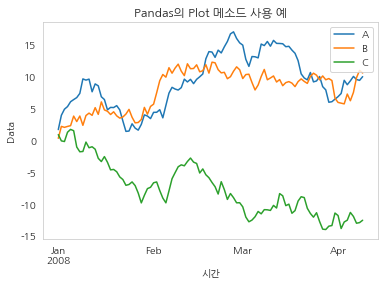

In [4]:
sns.set_style("whitegrid")

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=12).get_name()
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family=font_name)

df1.plot()  # DataFrame을 이용해 그릴 경우에는 .plot() 형태로.... pandas가 plot method를 내장하고 있기 때문
plt.title("Pandas의 Plot 메소드 사용 예")
plt.xlabel("시간")
plt.ylabel("Data")
plt.grid()
plt.legend(loc="upper right")
plt.show()

plot 메서드의 kind라는 인수를 바꾸면 여러가지 플롯을 그릴 수 있다. 다음과 같은 인수값을 지원한다.

+ bar
+ pie
+ hist
+ kde
+ box
+ scatter
+ area

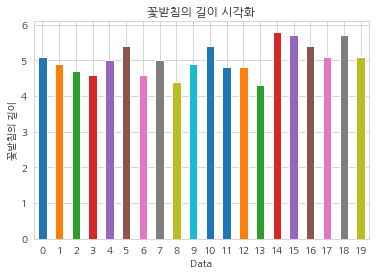

In [5]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

iris.sepal_length[:20].plot(kind='bar', rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.grid(True)
plt.show()

kind 인수에 문자열을 쓰는 대신 plot.bar처럼 직접 메서드로 사용할 수도 있다.

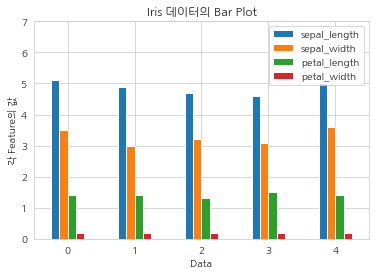

In [6]:

iris[:5].plot.bar(rot=0)
plt.title("Iris 데이터의 Bar Plot")
plt.xlabel("Data")
plt.ylabel("각 Feature의 값")
plt.ylim(0, 7)
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

In [7]:
df2 = iris.groupby(iris.species).mean()
df2.columns.name = "feature"
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


그룹분석 결과도 데이터프레임이므로 같은 방식으로 시각화할 수 있다.

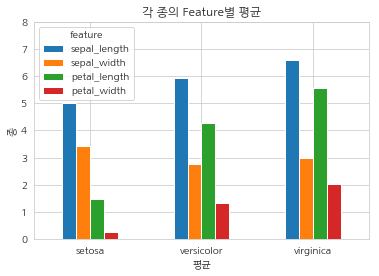

In [8]:
df2.plot.bar(rot=0)
plt.title("각 종의 Feature별 평균")
plt.xlabel("평균")
plt.ylabel("종")
plt.ylim(0, 8)
plt.grid(True)
plt.show()

전치연산으로 시각화 방법을 다르게 할 수도 있다.

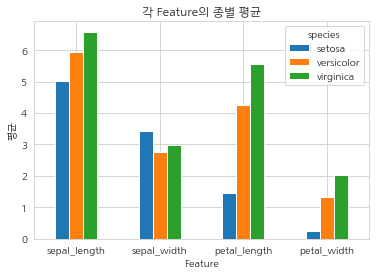

In [9]:
df2.T.plot.bar(rot=0)
plt.title("각 Feature의 종별 평균")
plt.xlabel("Feature")
plt.ylabel("평균")
plt.grid(True)
plt.show()

다음은 pie, hist, kde, box, scatter 플롯 예제이다.

In [10]:
df3 = titanic.pclass.value_counts()
df3

3    491
1    216
2    184
Name: pclass, dtype: int64

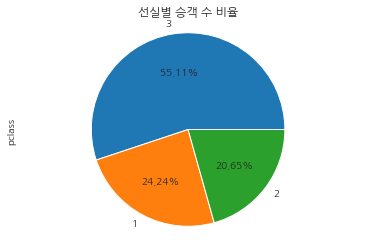

In [11]:
df3.plot.pie(autopct="%.2f%%")
plt.title("선실별 승객 수 비율")
plt.axis('equal')
plt.show()

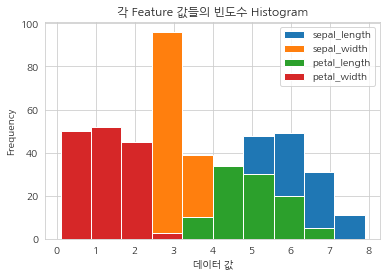

In [12]:
iris.plot.hist()
plt.title("각 Feature 값들의 빈도수 Histogram")
plt.xlabel("데이터 값")
plt.show()

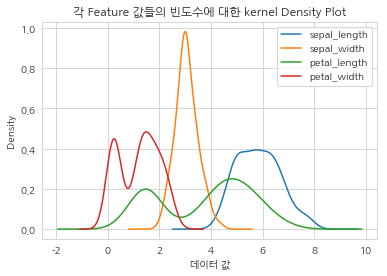

In [14]:
iris.plot.kde()
plt.title("각 Feature 값들의 빈도수에 대한 kernel Density Plot")
plt.xlabel("데이터 값")
plt.show()

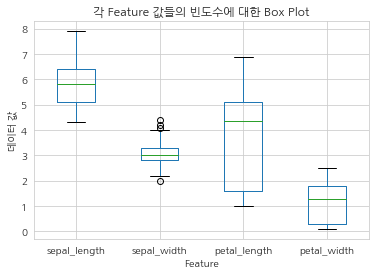

In [15]:
iris.plot.box()
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show()

박스플롯에 대해서는 추가적인 기능을 가진 boxplot 명령이 별도로 있다.

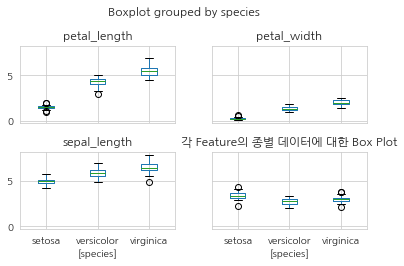

In [16]:
iris.boxplot(by="species")
plt.tight_layout(pad=3, h_pad=1)
plt.title("각 Feature의 종별 데이터에 대한 Box Plot")
plt.show()